In [71]:
# import os
import sys

sys.path.insert(0, r"/mnt/c/Users/Trez/Desktop/tudat-bundle/tudatpy/")
import numpy as np
import datetime

from tudatpy.kernel.interface import spice
from tudatpy.kernel import numerical_simulation
from tudatpy.kernel.numerical_simulation import environment_setup
from tudatpy.kernel.numerical_simulation import propagation_setup
from tudatpy.kernel.numerical_simulation import estimation, estimation_setup
from tudatpy.kernel.numerical_simulation.estimation_setup import observation

# from astropy.time import Time
from astropy.coordinates import EarthLocation
from astropy import units as u

# from pac.data import BatchMPC
from tudatpy.data.mpc import BatchMPC
from tudatpy.data.sbdb import SBDBquery
from tudatpy.data.horizons import HorizonsQuery
# import tudatpy.data as data

import matplotlib.pyplot as plt

# from astroquery.jplsbdb import SBDB

import time


In [72]:
centre = "Sun"

In [75]:
start_dt = datetime.datetime(2018, 11, 1)
end_dt = datetime.datetime(2023, 6, 1)

# codes = list(range(1, 11))
codes = ["433", "162173", "16", 719, 3903]
codes = [162173, 887, 433]
codes = [980, 1467, 433]
codes = [1021, 568, 980, 1467, 433]
codes = [10, 433, 329]
codes = [200, 650, 980]
codes = [238, 433, 329]
# codes = [238, 200, 433, 329]

# codes = sorted(codes)

start = time.perf_counter()
# names = [SBDBquery(code).shortname for code in codes]
# spks = [SBDBquery(code).spicename for code in codes]
end = time.perf_counter()
print(end-start, "s")
# print(names)
# print(spks)

# print((SBDB.query(1, phys=True)["phys_par"]["GM"]))
# print((SBDB.query(1, phys=True)["phys_par"]["GM"]).to(u.m**3/u.s**2))
# print(SBDB.schematic(SBDB.query(1, phys=True)))

1.539999993838137e-05 s



   Batch Summary:
1. Batch includes 1 minor planets:
   ['238']
2. Batch includes 1610 observations, including 97 observations from space telescopes
3. The observations range from 2018-11-02 08:33:39.743997 to 2023-05-20 10:18:34.070387
   In seconds TDB since J2000: 594419688.9265225 to 737849983.2555681
   In Julian Days: 2458424.85671 to 2460084.929561
4. The batch contains observations from 25 observatories, including 1 space telescopes

238

   Batch Summary:
1. Batch includes 1 minor planets:
   ['433']
2. Batch includes 1284 observations, including 86 observations from space telescopes
3. The observations range from 2018-11-05 18:03:13.535985 to 2023-05-29 11:10:29.827215
   In seconds TDB since J2000: 594713062.7185509 to 738630699.0121946
   In Julian Days: 2458428.25224 to 2460093.965623
4. The batch contains observations from 45 observatories, including 1 space telescopes

433

   Batch Summary:
1. Batch includes 1 minor planets:
   ['329']
2. Batch includes 1930 observatio

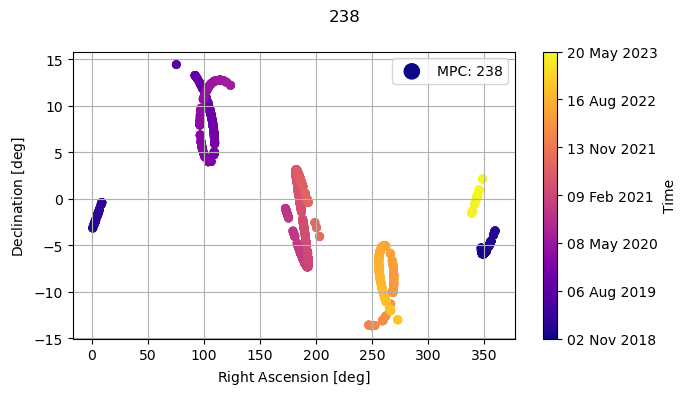

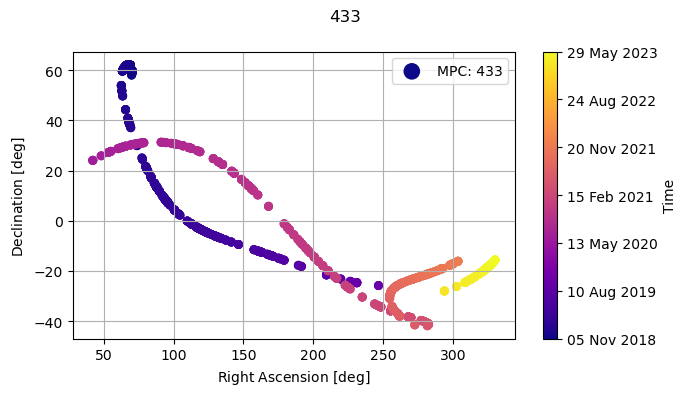

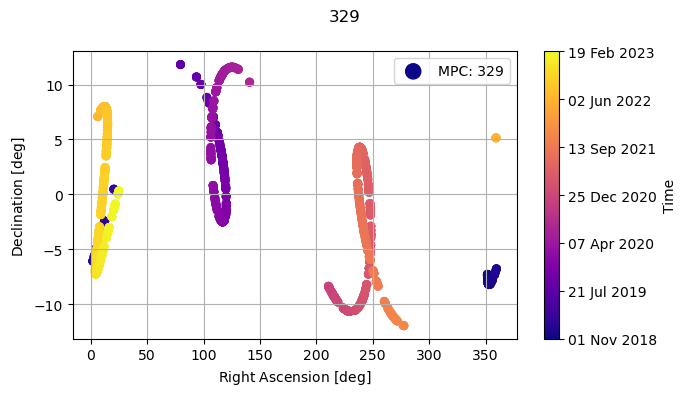

In [76]:
for code in (codes):
    batch = BatchMPC()
    batch.get_observations([code])
    batch.filter(
        epoch_start=start_dt,
        epoch_end=end_dt,
        observatories_exclude=["C59", "C57"],
    )
    # print(len(batch))
    batch.summary()
    # fig = batch.plot_observations(projection="aitoff")
    fig = batch.plot_observations(projection=None)
    fig.set_size_inches(7, 4)
    print(code)
    fig.suptitle(code)

plt.show()